### Fig. 3

#### Here we share a set of demonstrative code for plotting the distribution of O${_3}$ exposure-associaetd mortality. Here we select the total non-communicable diseases (NCDs) of 2019 as an example. Full database can be shared upon request to Dr Haitong Z Sun (zs347@cam.ac.uk) for research collaboration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### We consider the urban, rural and total population mortalities. 

In [2]:
mort_19 = pd.read_csv('/Volumes/Database/CHNoz/conc/ozone_19_mort_china(0919).csv')
mort_19['ncd_urban'] = mort_19['ncd_25_death_urban_est']
mort_19['ncd_rural'] = mort_19['ncd_25_death_rural_est']
mort_19_city = mort_19.groupby(['province','city']).sum()[['ncd_urban','ncd_rural']]
mort_19_city['ncd_total'] = mort_19_city['ncd_urban'] + mort_19_city['ncd_rural']
mort_19_city.to_csv('Fig. 3 mort_Province_city_2019.csv')

#### A targeted mortality estimation dataset for aggregared mapping should be like this: 

In [3]:
mort_19_city

,province,city,ncd_urban,ncd_rural,ncd_total
0,上海,上海市,4569.883065,4.573279,4574.456344
1,上海,崇明県,0.000000,77.091751,77.091751
2,云南,个旧市,98.241750,705.856082,804.097831
3,云南,中甸县,0.233950,61.658685,61.892635
4,云南,临沧县,16.941668,414.616627,431.558295
...,...,...,...,...,...
374,黑龙江,绥化市,102.865678,942.587239,1045.452917
375,黑龙江,鸡西市,70.194621,227.532984,297.727605
376,黑龙江,鹤岗市,12.090989,172.307145,184.398134
377,黑龙江,黑河市,0.000000,341.855045,341.855045


#### Similarly, special treatment for Hainan Province 

In [4]:
mort_19_county = mort_19.groupby(['province','county']).sum()[['ncd_urban','ncd_rural']]
mort_19_county['ncd_total'] = mort_19_county['ncd_urban'] + mort_19_county['ncd_rural']
mort_19_Hainan = mort_19_county[mort_19_county['province'] == '海南']
mort_19_Hainan.to_csv('Fig. 3 mort_Hainan_2019.csv', index = False)

#### These 2 files will then be imported in ArcMap/QGIS for region-aggregated mapping, but we here can still have a look at the mortality distribution. 

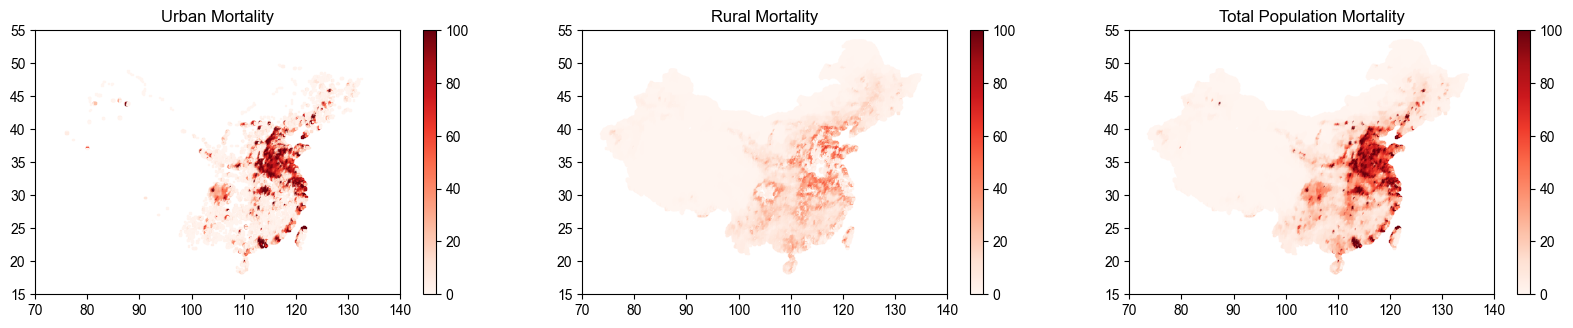

In [5]:
plt.figure(num=None, figsize=(20, 3.5), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams['font.sans-serif']=['Arial']
cm = plt.cm.get_cmap('Reds')

plt.subplot(1,3,1)
mort_19_urban=mort_19[mort_19['population_urban_19']>0]
x = mort_19_urban['longitude']
y = mort_19_urban['latitude']
z = mort_19_urban['ncd_25_death_urban_est']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=100, s=1, cmap=cm)
plt.xlim([70, 140])
plt.ylim([15, 55])
plt.title("Urban Mortality")
plt.colorbar(sc)

plt.subplot(1,3,2)
mort_19_rural=mort_19[mort_19['population_rural_19']>0]
x = mort_19_rural['longitude']
y = mort_19_rural['latitude']
z = mort_19_rural['ncd_25_death_rural_est']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=100, s=1, cmap=cm)
plt.xlim([70, 140])
plt.ylim([15, 55])
plt.title("Rural Mortality")
plt.colorbar(sc)

plt.subplot(1,3,3)
x = mort_19['longitude']
y = mort_19['latitude']
z = mort_19['ncd_25_death_urban_est']+mort_19['ncd_25_death_rural_est']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=100, s=1, cmap=cm)
plt.xlim([70, 140])
plt.ylim([15, 55])
plt.title("Total Population Mortality")
plt.colorbar(sc)

plt.show()